# Train a Quadcopter How to Fly

The final project of the Nanodegree program of [Udacity](www.udacity.com) is to design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of my choice.

The goal of this training is to train a quadcopter to reach a specific target in a 3-D space and stay there the longest time possible in one episode (5 seconds).

This project is very challenging, since the agent needs to explore a continuos 3-D space, it can also rotate in its own axis along these 3 dimensions. Moreover, the 3 linear and 3 angular velocities follows the Physics laws modeled in `physics_sim.py`. The agent has control of 4 actions, which can be seen as a 4 dimensional continuous action space. The potential combinations between states and actions is massive, and therefore, we need a Deep Reinforcement Learning architechture to train this agent.

## Introduction

These are the files in the directory to better understand the structure of the project. 

- `task.py`: Task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here by *Udacity*.
    - `agent.py`: My agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter provided by *Udacity*.
- `model.py`: This file contains the neural network architechture. 

I defined my own task in `task.py` starting from the template offered by *Udacity*.
Then, I designed a reinforcement learning agent in `agent.py` to complete this task. 
The model is a deep learning neural net architechture that has an actor and critic agents because the action space is continous (so the actor is a good choice), and the critic to compute the gradients for the actor. I used the experience replay and add a Ornstein-Uhlenbeck noise process. I regularized the network to allow a better generalization by adding a dropout of 10% at every layer. You're welcome to revise the file `model.py` for more details. The architechture uses a Deep Deterministic Policy Gradient (DDPG) for learning and it includes a soft update of the weights.


## Controlling the Quadcopter

*Udacity* provides a sample agent in the code cell below to show how to use the sim to control the quadcopter. The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

The code cell below makes the agent selects actions to control the quadcopter and the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task
from agents.agent import DDPG

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)

done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Using TensorFlow backend.


In the code cell below we can visualize how the position of the quadcopter evolved during the simulation.

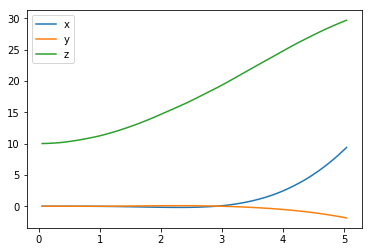

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

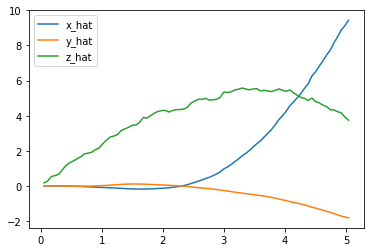

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, we can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

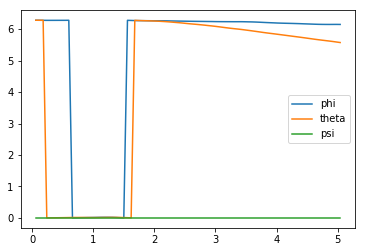

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

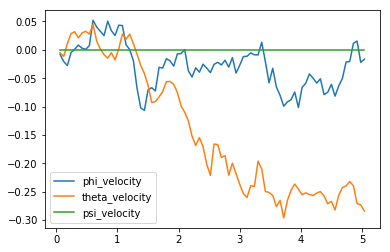

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, we can use the code cell below to print the agent's choice of actions.  

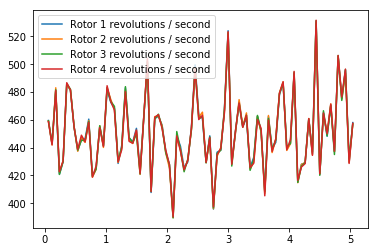

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, we need to derive the environment state from the simulator. The code cell below prints the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 9.38343468 -1.87227379 29.69701138  6.14964852  5.57463082  0.        ]
[ 9.43391614 -1.82164396  3.74187098]
[-0.01655473 -0.2842401   0.        ]


In the task in `task.py`, I use the 12-dimensional pose and velocities of the quadcopter to construct the state of the environment at each timestep. 

## The Task

A task has been described in `task.py`. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, I make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps. For more information with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- I set the number of elements in the state vector.  For the task, we will be working with the 12-dimensional pose and velocities information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). It is possible to set the minimum (`action_low`) and maximum (`action_high`) values of each entry.
- The task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  There is an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

## The Agent

The sample agent given by *Udacity* in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 2000
target_pos = np.array([0., 0., 700.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task)
agent.score = -np.inf
all_the_rewards_default = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            all_the_rewards_default.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 2000, score = -18.669 (best =  -8.186), noise_scale = 3.2ale = 3.2best =  -8.186), noise_scale = 3.2

Text(0,0.5,'Total Reward')

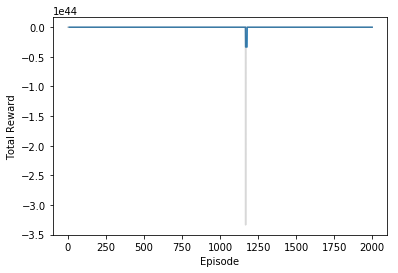

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 


rews = np.array(all_the_rewards_default).T
eps = np.arange(num_episodes)
smoothed_rews = running_mean(rews, 10)
plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total Reward')

There are few extreme outliers while recording the total number of rewards in 4 episodes. By removing the, we can have a better intuition around about the total amount of rewards the sample agent could collect in 1996 different episodes.

Text(0,0.5,'Total Reward')

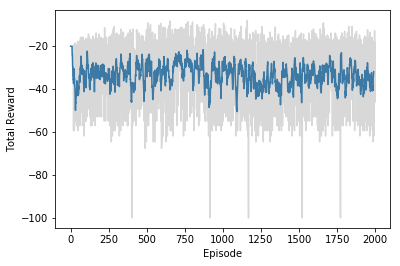

In [25]:
def_results = np.array(all_the_rewards_default).astype(np.float)
def_results[def_results < -100] = -100
def_results_smooth = running_mean(def_results, 10)
plt.plot(def_results_smooth)
plt.plot(def_results, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total Reward')

This agent should perform very poorly on this task.  Let's now define and traing an agent that uses Deep Reinforcement Learning to solve this task.

## Defining the task, designing the agent and training

The `task.py` specifies that we like to teach the quadcopter to takeoff and reach a target pose.  

After specifying your task, I defined my own agent in `agents/agent.py` as described in the **Introduction**. You're welcome to open the file to see further details.

The cell belows keeps track of the total amount of rewards collected by this agent during training in 1000 episodes.

In [11]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 700.])
task = Task(target_pos = target_pos)
agent = DDPG(task) 
all_the_rewards = []
reward_last_e = []

for i_episode in range(1, num_episodes + 1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        if i_episode == (num_episodes):
            reward_last_e.append(reward)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            all_the_rewards.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
            break
    sys.stdout.flush()


Episode = 1000, score =   3.055 (best =   3.571)

## Plotting the rewards

The cell bellow plots the episode rewards, from a single runs (gray), and averaged over multiple runs (blue). 

Text(0,0.5,'Total Reward')

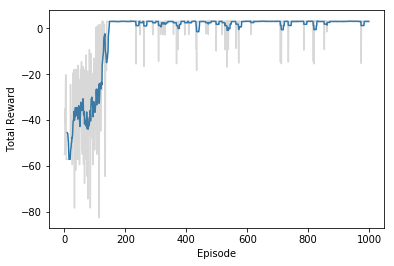

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 


rews = np.array(all_the_rewards).T
eps = np.arange(num_episodes)
smoothed_rews = running_mean(rews, 10)
plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total Reward')

## Final notes

We can see how the DDPG agent learns smoothly over the first 200 episodes, collecting from about -50 rewards up to 3 rewards per episode. After some training, the DDPG agent keep collecting *high* rewards. We can then compare the performance of the DDPG agent and the sample agent. The sample agent collect in average -36 rewards per episode in the last 100 episodes. While the DDPG agent collects 2.89 rewards per episode in the last 100 episodes!